**Assignment 1**
**Section 1 (Python)**

Problem 1
In this problem, you will implement a class that represents a data sample with numerical features.

In [4]:
class DataSample:
    def __init__(self, features, label):
        """
        Store feature list and label string.
        """
        self.features = features
        self.label = label

    def min_max_norm(self):
        """
        Apply min-max normalization to features in-place.
        Handle case where max == min.
        """
        if not self.features:
            return

        mn = min(self.features)
        mx = max(self.features)

        if mx == mn:
            self.features = [0 for _ in self.features]
            return

        self.features = [(f - mn) / (mx - mn) for f in self.features]

    def scaled(self, factor):
        """
        Return a new scaled list (does NOT modify original).
        """
        return [f * factor for f in self.features]


Test with sample case

In [11]:
sample = DataSample([12.0, 5.0, 7.5, 20.0], "sparrow")

print("Original features:", sample.features)
print("Label:", sample.label)

sample.min_max_norm()
print("After normalization:", sample.features)

scaled_output = sample.scaled(3)
print("After scaling x3 (new list):", scaled_output)


Original features: [12.0, 5.0, 7.5, 20.0]
Label: sparrow
After normalization: [0.4666666666666667, 0.0, 0.16666666666666666, 1.0]
After scaling x3 (new list): [1.4, 0.0, 0.5, 3.0]


Expected Output:

In [ ]:
Original features: [12.0, 5.0, 7.5, 20.0]
Label: sparrow
After normalization: [0.4666666666666667, 0.0, 0.16666666666666666, 1.0]
After scaling x3 (new list): [1.4, 0.0, 0.5, 3.0]


Problem 2 — sort_by_unique_chars
Sorting Logic:

1.Count number of unique characters in each word.

2.Sort by:

Descending unique count
If equal → alphabetically ascending

In [8]:
def sort_by_unique_chars(words):
    """
    Sort words by:
    1) number of unique characters (descending)
    2) alphabetical order (ascending) for ties
    """
    return sorted(words, key=lambda w: (-len(set(w)), w))


Test Code

In [12]:
input_data_fruits= ["melon", "papaya", "cherry", "fig", "orange"]
output = sort_by_unique_chars(input_data_fruits)
print(output)


['orange', 'cherry', 'melon', 'fig', 'papaya']


Expected output:

In [ ]:
['orange', 'cherry', 'melon', 'fig', 'papaya']


**Section 2 (NumPy)**

Problem 1
In this problem, you will work with NumPy arrays to practice masking, slicing, advanced indexing, and broadcasting. Follow each step sequentially using only NumPy operations (no Python loops).

In [13]:
import numpy as np

np.random.seed(42)  # for reproducibility — remove if you want different runs

# -------------------------
# Problem 1 (NumPy)
# -------------------------

# 1) Generate a 10x10 array X with random integers in [0, 100]
X = np.random.randint(0, 101, size=(10, 10))
print("Original X:\n", X)

# 2) Create boolean mask for values between 20 and 50 inclusive
mask = (X >= 20) & (X <= 50)

# 3) Replace those values in-place with -1
X[mask] = -1
print("\nModified X (values 20..50 replaced by -1):\n", X)

# 4) Extract 6x6 submatrix: rows 2..7 (8 excluded), cols 3..8 (9 excluded)
sub = X[2:8, 3:9]   # shape (6,6)
print("\n6x6 submatrix 'sub':\n", sub)

# 5) Extract diagonal elements of sub using advanced indexing
idx = np.arange(6)
diag_vals = sub[idx, idx]   # 1D array length 6
print("\nDiagonal elements of sub:\n", diag_vals)

# 6) Construct 10x10 matrix M with M[i,j] = (i - j)^2 using broadcasting
i = np.arange(10).reshape(10, 1)   # shape (10,1)
j = np.arange(10).reshape(1, 10)   # shape (1,10)
M = (i - j) ** 2
print("\nStructured matrix M ( (i-j)^2 ):\n", M)

Original X:
 [[ 51  92  14  71  60  20  82  86  74  74]
 [ 87  99  23   2  21  52   1  87  29  37]
 [  1  63  59  20  32  75  57  21  88  48]
 [ 90  58  41  91  59  79  14  61  61  46]
 [ 61  50  54  63   2 100  50   6  20  72]
 [ 38  17   3  88  59  13   8  89  52   1]
 [ 83  91  59  70  43   7  46  34  77  80]
 [ 35  49   3   1   5  53   3  53  92  62]
 [ 17  89  43  33  73  61  99  13  94  47]
 [ 14  71  77  86  61  39  84  79  81  52]]

Modified X (values 20..50 replaced by -1):
 [[ 51  92  14  71  60  -1  82  86  74  74]
 [ 87  99  -1   2  -1  52   1  87  -1  -1]
 [  1  63  59  -1  -1  75  57  -1  88  -1]
 [ 90  58  -1  91  59  79  14  61  61  -1]
 [ 61  -1  54  63   2 100  -1   6  -1  72]
 [ -1  17   3  88  59  13   8  89  52   1]
 [ 83  91  59  70  -1   7  -1  -1  77  80]
 [ -1  -1   3   1   5  53   3  53  92  62]
 [ 17  89  -1  -1  73  61  99  13  94  -1]
 [ 14  71  77  86  61  -1  84  79  81  52]]

6x6 submatrix 'sub':
 [[ -1  -1  75  57  -1  88]
 [ 91  59  79  14  61  61]
 [ 

**Problem 2**

In this problem, you will work with NumPy arrays representing class scores for multiple samples. You will practice row-wise normalization, broadcasting, and boolean masking.

In [14]:
# 1) Create scores (5x4) with integers in [0,20]
scores = np.random.randint(0, 21, size=(5, 4))
print("\nOriginal scores:\n", scores)

# 2) For each row, subtract the row-wise maximum (use broadcasting)
row_max = scores.max(axis=1, keepdims=True)    # shape (5,1)
shifted_scores = scores - row_max               # broadcasting subtract
print("\nShifted scores (row-wise max subtracted):\n", shifted_scores)

# 3) exp_scores = np.exp(shifted_scores)
exp_scores = np.exp(shifted_scores)
print("\nexp_scores:\n", exp_scores)

# 4) Normalize each row so that row sums to 1 (softmax rows)
probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)
print("\nRow-normalized probabilities (probs):\n", probs)

# 5) Predicted class per sample: index of largest value in each row
y_pred = probs.argmax(axis=1)
print("\nPredicted classes (y_pred):\n", y_pred)

# 6) Create true labels y_true (length 5, values 0..3)
#    Here we create an example set; replace with your true labels if provided.
y_true = np.array([0, 1, 2, 3, 1])
print("\nTrue labels (y_true):\n", y_true)

# 7) Boolean mask of correct predictions and accuracy
correct_mask = (y_pred == y_true)
accuracy = correct_mask.mean()
print("\nCorrect mask:\n", correct_mask)
print("Accuracy:", accuracy)


Original scores:
 [[12  8 14 12]
 [ 0  6  8  0]
 [11  7 10 18]
 [16  7  2  2]
 [ 0  4  9  6]]

Shifted scores (row-wise max subtracted):
 [[ -2  -6   0  -2]
 [ -8  -2   0  -8]
 [ -7 -11  -8   0]
 [  0  -9 -14 -14]
 [ -9  -5   0  -3]]

exp_scores:
 [[1.35335283e-01 2.47875218e-03 1.00000000e+00 1.35335283e-01]
 [3.35462628e-04 1.35335283e-01 1.00000000e+00 3.35462628e-04]
 [9.11881966e-04 1.67017008e-05 3.35462628e-04 1.00000000e+00]
 [1.00000000e+00 1.23409804e-04 8.31528719e-07 8.31528719e-07]
 [1.23409804e-04 6.73794700e-03 1.00000000e+00 4.97870684e-02]]

Row-normalized probabilities (probs):
 [[1.06299616e-01 1.94694537e-03 7.85453823e-01 1.06299616e-01]
 [2.95299995e-04 1.19132521e-01 8.80276879e-01 2.95299995e-04]
 [9.10730760e-04 1.66806157e-05 3.35039123e-04 9.98737550e-01]
 [9.99874943e-01 1.23394371e-04 8.31424730e-07 8.31424730e-07]
 [1.16793629e-04 6.37671608e-03 9.46388577e-01 4.71179128e-02]]

Predicted classes (y_pred):
 [2 2 3 0 2]

True labels (y_true):
 [0 1 2 3 1]



**Section 3 - Pandas and MatPlotLib**
**Creating Batches for Training and Testing Using Pandas **

1) Download & load the CSV,

In [15]:
# Cell 1 - Imports and download
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reproducible
RND = 42
np.random.seed(RND)

# URL given in the assignment
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"

# read directly from URL
df = pd.read_csv(url)

# show top 5 rows
print("Shape:", df.shape)
df.head()


Shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


2.Create multiple dataframes with columns sorted

In [16]:
# Cell 2 - create sorted DataFrames

# Verify the exact column names in this dataset
print("Columns:", df.columns.tolist())

# Typical column names in this CSV: 'gender', 'race/ethnicity', 'parental level of education',
# 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score'

# Create sorted dataframes (ascending by default; change ascending=False if needed)
df_math_sorted    = df.sort_values(by='math score',    ascending=True).reset_index(drop=True)
df_gender_sorted  = df.sort_values(by='gender',        ascending=True).reset_index(drop=True)
df_race_sorted    = df.sort_values(by='race/ethnicity',ascending=True).reset_index(drop=True)
df_reading_sorted = df.sort_values(by='reading score', ascending=True).reset_index(drop=True)
df_writing_sorted = df.sort_values(by='writing score', ascending=True).reset_index(drop=True)

# For convenience store them in a dict
sorted_dfs = {
    'math': df_math_sorted,
    'gender': df_gender_sorted,
    'race': df_race_sorted,
    'reading': df_reading_sorted,
    'writing': df_writing_sorted
}

# Show a quick preview for each
for name, sdf in sorted_dfs.items():
    print(f"\n--- top 3 rows of df_{name}_sorted ---")
    display(sdf.head(3))


Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

--- top 3 rows of df_math_sorted ---


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28



--- top 3 rows of df_gender_sorted ---


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group D,some college,free/reduced,completed,63,80,80
2,female,group E,bachelor's degree,free/reduced,completed,92,100,100



--- top 3 rows of df_race_sorted ---


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some college,standard,completed,72,79,82
1,female,group A,some high school,standard,completed,92,100,97
2,female,group A,some high school,standard,completed,85,90,92



--- top 3 rows of df_reading_sorted ---


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,male,group A,some college,free/reduced,none,28,23,19
2,male,group B,high school,free/reduced,none,30,24,15



--- top 3 rows of df_writing_sorted ---


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,male,group B,high school,free/reduced,none,30,24,15
2,male,group A,some college,free/reduced,none,28,23,19


3.Create 2 non-overlapping dataframes test_df and train_df with 20% test and ensure race proportions are similar

In [17]:
# Cell 3 - stratified split by race/ethnicity (20% test, 80% train) using pandas groupby sampling
test_frac = 0.20
group_col = 'race/ethnicity'  # column to stratify on

# for reproducibility use sample(frac=..., random_state=RND)
test_parts = []
train_parts = []

for name, group in df.groupby(group_col):
    n = len(group)
    n_test = int(np.round(test_frac * n))  # round to nearest integer
    # sample test rows
    test_sample = group.sample(n=n_test, random_state=RND)
    train_sample = group.drop(test_sample.index)
    test_parts.append(test_sample)
    train_parts.append(train_sample)

test_df = pd.concat(test_parts).sample(frac=1, random_state=RND).reset_index(drop=True)   # shuffled
train_df = pd.concat(train_parts).sample(frac=1, random_state=RND).reset_index(drop=True)  # shuffled

print("Original df shape:", df.shape)
print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)


Original df shape: (1000, 8)
train_df shape: (800, 8)
test_df shape: (200, 8)


4.Plot race distribution in train_df and test_df and check proportions

                train_prop  test_prop     diff
race/ethnicity                                
group A            0.08875       0.09 -0.00125
group B            0.19000       0.19  0.00000
group C            0.31875       0.32 -0.00125
group D            0.26250       0.26  0.00250
group E            0.14000       0.14  0.00000


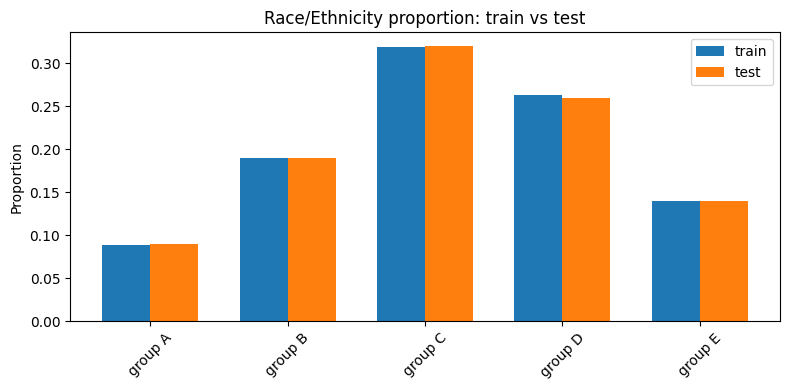

In [18]:
# Cell 4 - compare race distributions
train_counts = train_df[group_col].value_counts(normalize=True).sort_index()
test_counts  = test_df[group_col].value_counts(normalize=True).sort_index()

summary = pd.DataFrame({'train_prop': train_counts, 'test_prop': test_counts}).fillna(0)
summary['diff'] = summary['train_prop'] - summary['test_prop']
print(summary)

# plot side-by-side bar chart
fig, ax = plt.subplots(figsize=(8,4))
x = np.arange(len(summary))
width = 0.35
ax.bar(x - width/2, summary['train_prop'], width, label='train')
ax.bar(x + width/2, summary['test_prop'], width, label='test')
ax.set_xticks(x)
ax.set_xticklabels(summary.index, rotation=45)
ax.set_ylabel('Proportion')
ax.set_title('Race/Ethnicity proportion: train vs test')
ax.legend()
plt.tight_layout()
plt.show()


5.Create batches from train_df — list of batches each of size 50

In [19]:
# Cell 5 - create batches of size 50
batch_size = 50

# shuffle train rows (already shuffled earlier, but reshuffle to be safe)
train_shuffled = train_df.sample(frac=1, random_state=RND).reset_index(drop=True)

n = len(train_shuffled)
n_batches = (n + batch_size - 1) // batch_size  # ceil division
batches = [ train_shuffled.iloc[i*batch_size : (i+1)*batch_size].reset_index(drop=True)
            for i in range(n_batches) ]

print("Number of training rows:", n)
print("Batch size:", batch_size)
print("Number of batches:", len(batches))

# Show size and first few rows of batch 0 (if exists)
if len(batches) > 0:
    print("\nFirst batch shape:", batches[0].shape)
    display(batches[0].head())
else:
    print("No batches created (train set too small).")


Number of training rows: 800
Batch size: 50
Number of batches: 16

First batch shape: (50, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,associate's degree,standard,completed,65,65,63
1,male,group B,high school,standard,completed,52,49,46
2,male,group C,associate's degree,standard,none,47,37,35
3,female,group D,some college,free/reduced,completed,67,86,83
4,male,group A,some high school,free/reduced,none,55,46,43
